In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Data Cleaning

In [2]:
df = pd.read_csv("Data1.csv")
df.columns = ["ts","age","gender","location","prof","income",
              "covidaff","vaccine","fin_aff","phy_aff","men_aff","comorb","ex_fq","pov_ex","trv_work",
              "trv_emrg","trv_vaca","cov_prec","aff_cov_wrklf","change_pf","focus_ph","focus_mh","focus_fin"]
df1 = df.drop("ts",axis=1)
df1.age = pd.to_numeric(df1.age,errors = "coerce").astype(pd.Int16Dtype())
df1.prof = df1.prof.str.lower()
df1["prof"].replace(to_replace = ["student", "student ", "nursing", "studying", "nursing student", "medical student", "mba student", "graphic designer", "completed bachelors, studying for cfa ", "design student ", "college student", "mbbs", "bsc nursing", "students ", "nursing students", "b.sc nursing", "b. sc nursing", "students ", "bsc nursing ", "nursing ", "students"], value = "student", inplace = True)
df1["prof"].replace(to_replace = ["service", "production engineer", "engineer", "it professional", "government servant", "employee in private company", "job at it", "graduate", "software developer", "private sector (business)", "educator ", "job", "it specialist", "marketing", "athlete/accountant", "doctor", "private ", "sales executive ", "trader", "private job", "graduate engineer", "government service", "govt employee", "gorvenment servant", "government", "digital creator, photografer, baker", "business", "government job", "insurance advisor", "government officer", "govt job", "pvt job ", "pvt  job", "govt service", "president", "executive ", "govt servant ", "self employed", "govt. service", "professor in pharmacy", "government employee", "advocate ", "govt servent ", "govt servant", "doctor ", "serving ", "teacher", "self employment", "government job ", "govt. service ", "data scientist", "executive in supply chain management ", "govt.employee", "government service ", "it", "corporate professional", "govt. servant ", "central government services ", "service ", "govt officer", "print media employee ", "physiotherapist", "hardware engineer", "officer", "invigilator for idp", "teaching", "nurse", "assistant manager", "agriculture", "job ", "nursing tutor", "govt. servant", "pvt job"], value = "employed", inplace = True)
df1["prof"].replace(to_replace = ["retired govt service", "retd ongc officer", "retired", "retired ", "home maker", "retired from ongc ", "household", "retired government servant", "house manager ", "housewife ", "house wife", "no", "un employees", "housewife"], value = "unemployed", inplace = True)
df1["gender"] = df1["gender"].fillna("Prefer not to say")
df1 = df1[df1["age"].notna()]
df1['age_grp'] = pd.cut(df1.age,5)

In [3]:
df2 = df1.copy(deep = True)
df2["gender"].replace(to_replace = ["Male", "Female", "Prefer not to say"], value = 1, inplace = True)
df1["gender1"] = df2["gender"]
df1["aff_cov_wrklf_str"] = [str(x) for x in df1.aff_cov_wrklf]

## Plots

In [4]:
def myfun(df=df1,x='income',y='fin_aff',xlabel = "income group", ylabel ="percentage",lenylab = 6,rot = 0):
    df_age = pd.concat([df1[x],df1[y].str.get_dummies()],axis=1)
    p = df_age.groupby(x).aggregate(sum)
    df123 = pd.DataFrame(pd.value_counts(df1[x]))
    g = p.div(df123[x],axis=0)
    f = plt.figure()
    x1 = [0.6,0.8,1,1.2,1.4]
    y1 = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    y = np.array([y1[i] for i in range(lenylab)])
    width = 0.2
    clrs = ["cyan","green","yellow","red","black"]
    da = len(g.index)
    for i in range(len(g.columns)):
        l = np.arange(x1[i],x1[i]+1.4*(da),1.5)
        plt.bar(l,g[g.columns[i]],width,color =clrs[i])
    plt.xticks(np.arange(1,1+1.5*len(g.index),1.5),list(g.index),rotation = rot)
    y2 = ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
    y3 = [y2[i] for i in range(lenylab)]
    plt.yticks(y,y3)
    plt.legend(list(g.columns), loc = "best")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

## In different age group change of profession during covid

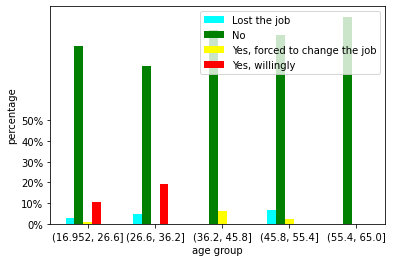

In [5]:
myfun(x = "age_grp",y = "change_pf",xlabel = "age group")

## How People of Different Income Group are affected Financially during Covid

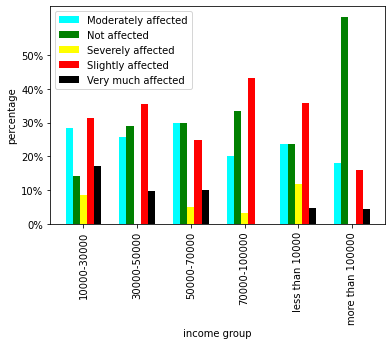

In [6]:
myfun(x = "income",y = "fin_aff",rot = 90)

## How People of Different Income Group Changed their Profession during Covid

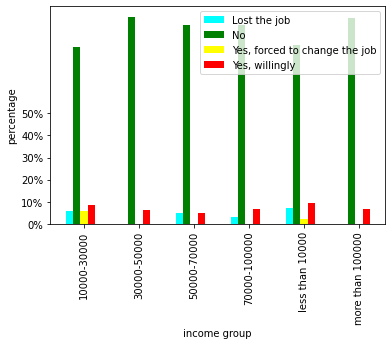

In [7]:
myfun(x = "income",y = "change_pf",rot = 90)

## How People of Different Income group are affected in their professional life in scale of 1 to 7 during Covid

Text(0.5, 0, 'income group')

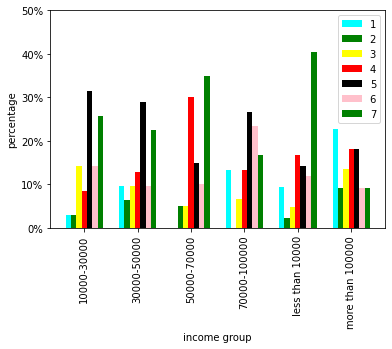

In [8]:
df_age = pd.concat([df1["income"],df1["aff_cov_wrklf_str"].str.get_dummies()],axis=1)
p = df_age.groupby("income").aggregate(sum)
df123 = pd.DataFrame(pd.value_counts(df1["income"]))
g = p.div(df123["income"],axis=0)
fig1 = plt.figure()
x = [0.55,0.7,0.85,1,1.15,1.3,1.45]
y = np.array([0,0.1,0.2,0.3,0.4,0.5])
width = 0.15
clrs = ["cyan","green","yellow","red","black","pink","green"]
da = len(g.index)
for i in range(len(g.columns)):
    l = np.arange(x[i],x[i]+1.4*(da),1.5)
    plt.bar(l,g[g.columns[i]],width,color =clrs[i])
plt.xticks(np.arange(1,1+1.5*len(g.index),1.5),list(g.index),rotation = 90)
plt.yticks(y,["0%","10%","20%","30%","40%","50%"])
plt.legend(list(g.columns))
plt.ylabel("percentage")
plt.xlabel("income group")

## How People catagorised Depending on their status on covid infection are affected in their professional life in scale of 1 to 7 during Covid

Text(0.5, 0, 'covid infection')

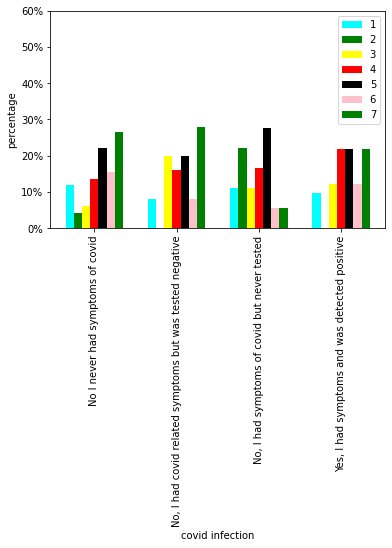

In [9]:
df_age = pd.concat([df1["covidaff"],df1["aff_cov_wrklf_str"].str.get_dummies()],axis=1)
p = df_age.groupby("covidaff").aggregate(sum)
df123 = pd.DataFrame(pd.value_counts(df1["covidaff"]))
g = p.div(df123["covidaff"],axis=0)
fig1 = plt.figure()
x = [0.55,0.7,0.85,1,1.15,1.3,1.45]
y = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6])
width = 0.15
clrs = ["cyan","green","yellow","red","black","pink","green"]
da = len(g.index)
for i in range(len(g.columns)):
    l = np.arange(x[i],x[i]+1.4*(da),1.5)
    plt.bar(l,g[g.columns[i]],width,color =clrs[i])
plt.xticks(np.arange(1,1+1.5*len(g.index),1.5),list(g.index),rotation = 90)
plt.yticks(y,["0%","10%","20%","30%","40%","50%","60%"])
plt.legend(list(g.columns))
plt.ylabel("percentage")
plt.xlabel("covid infection")

## How People of Different Income Group are focusing in Finance during Covid

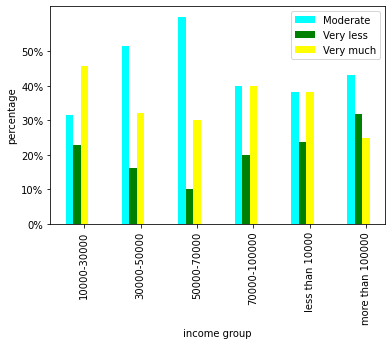

In [10]:
myfun(x = "income",y = "focus_fin",rot = 90)

## How People with or without Comorbidity are Focusing on their Physical Health during Covid

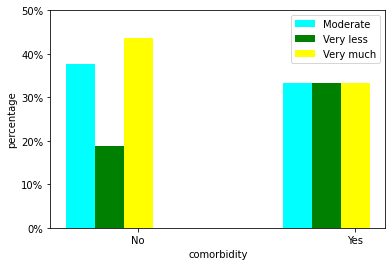

In [11]:
myfun(x = "comorb",y = "focus_ph",xlabel = "comorbidity")

## How People Depending on their status on covid infection changed their Profeession during Covid

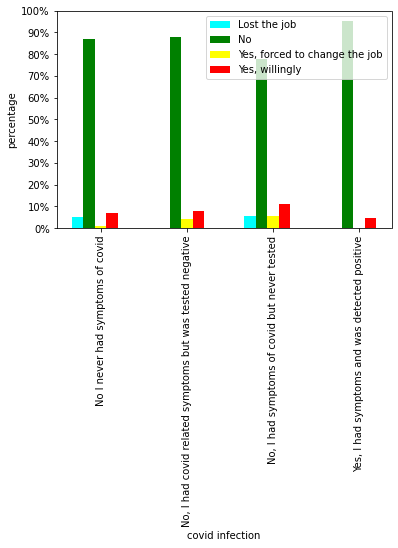

In [12]:
myfun(x = "covidaff",y = "change_pf",xlabel = "covid infection",rot = 90,lenylab=11)

## How People Depending on their status on Vaccination are travelling for vacation during Covid

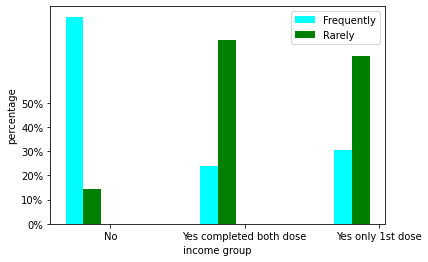

In [13]:
myfun(x = "vaccine",y = "trv_vaca")

## How People Depending on their status on Vaccination are taking Precautions before going out during Covid

Text(0.5, 1.0, 'Vaccination status vs Precautions taken')

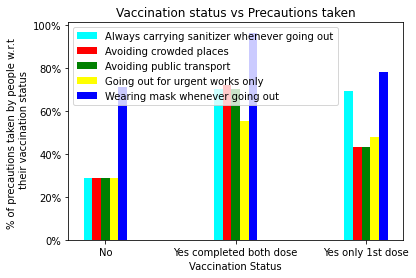

In [14]:
df_vaccine_pr = pd.concat([df1.vaccine, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p9 = df_vaccine_pr.groupby("vaccine").aggregate(sum)
dd = df1["cov_prec"].str.get_dummies(sep = ";")
df1_9 = pd.DataFrame(pd.value_counts(df1.vaccine))
g9 = p9.div(df1_9["vaccine"], axis = 0)


f9 = plt.figure()
x9 = np.array([1,4,7])
y9 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x9 - 0.4, g9["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x9 - 0.2, g9["Avoiding crowded places"], width, color = "red")
plt.bar(x9, g9["Avoiding public transport"], width, color = "green")
plt.bar(x9 + 0.2, g9["Going out for urgent works only"], width, color = "yellow")
plt.bar(x9 + 0.4, g9["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x9, list(g9.index))
plt.yticks(y9, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g9.columns, loc = "best")
plt.xlabel("Vaccination Status")
plt.ylabel("% of precautions taken by people w.r.t \n their vaccination status")
plt.title("Vaccination status vs Precautions taken")

## How People of Different Age groups are Focusing on Physical Health during Covid

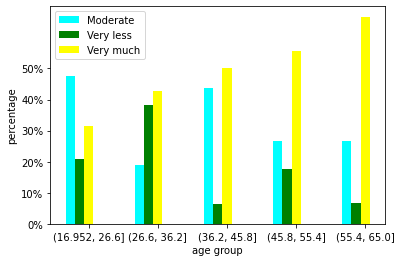

In [15]:
myfun(x = "age_grp",y = "focus_ph",xlabel = "age group")

## How People of Different Age groups are Focusing on Mental Health during Covid 

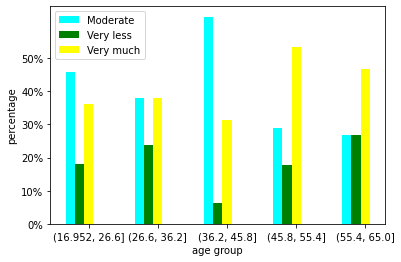

In [16]:
myfun(x = "age_grp",y = "focus_mh",xlabel = "age group")

## How People Depending on their status on Covid infection are taking Precautions before going out during Covid

Text(0.5, 1.0, 'Covid status vs Precautions taken')

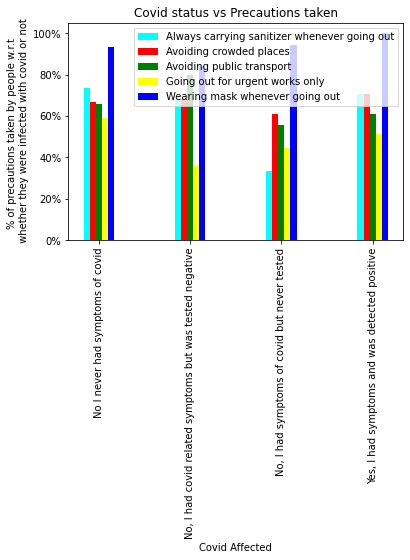

In [33]:
df_covid_pr = pd.concat([df1.covidaff, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p10 = df_covid_pr.groupby("covidaff").aggregate(sum)
df1_10 = pd.DataFrame(pd.value_counts(df1.covidaff))
g10 = p10.div(df1_10["covidaff"], axis = 0)


f10 = plt.figure()
x10 = np.array([1,4,7,10])
y10 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x10 - 0.4, g10["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x10 - 0.2, g10["Avoiding crowded places"], width, color = "red")
plt.bar(x10, g10["Avoiding public transport"], width, color = "green")
plt.bar(x10 + 0.2, g10["Going out for urgent works only"], width, color = "yellow")
plt.bar(x10 + 0.4, g10["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x10, list(g10.index), rotation = 90)
plt.yticks(y10, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g10.columns, loc = "best")
plt.xlabel("Covid Affected")
plt.ylabel("% of precautions taken by people w.r.t \n whether they were infected with covid or not")
plt.title("Covid status vs Precautions taken")

## How People are taking Precautions While going out for work during Covid

Text(0.5, 1.0, 'Work Travel vs Precautions taken')

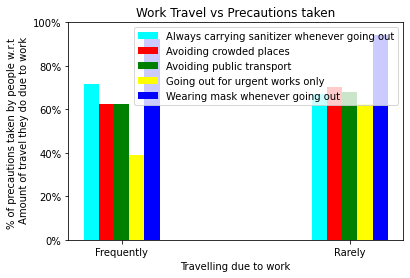

In [19]:
df_work_pr = pd.concat([df1.trv_work, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p11 = df_work_pr.groupby("trv_work").aggregate(sum)
df1_11 = pd.DataFrame(pd.value_counts(df1.trv_work))
g11 = p11.div(df1_11["trv_work"], axis = 0)

f11 = plt.figure()
x11 = np.array([1,4])
y11 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x11 - 0.4, g11["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x11 - 0.2, g11["Avoiding crowded places"], width, color = "red")
plt.bar(x11, g11["Avoiding public transport"], width, color = "green")
plt.bar(x11 + 0.2, g11["Going out for urgent works only"], width, color = "yellow")
plt.bar(x11 + 0.4, g11["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x11, list(g11.index))
plt.yticks(y11, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g11.columns, loc = "best")
plt.xlabel("Travelling due to work")
plt.ylabel("% of precautions taken by people w.r.t \n Amount of travel they do due to work")
plt.title("Work Travel vs Precautions taken")

## How People are taking Precautions While going out for vacation during Covid

Text(0.5, 1.0, 'Vacation Travel vs Precautions taken')

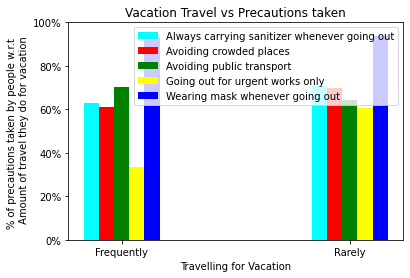

In [20]:
df_vaca_pr = pd.concat([df1.trv_vaca, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p12 = df_vaca_pr.groupby("trv_vaca").aggregate(sum)
df1_12 = pd.DataFrame(pd.value_counts(df1.trv_vaca))
g12 = p12.div(df1_12["trv_vaca"], axis = 0)

f12 = plt.figure()
x12 = np.array([1,4])
y12 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x12 - 0.4, g12["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x12 - 0.2, g12["Avoiding crowded places"], width, color = "red")
plt.bar(x12, g12["Avoiding public transport"], width, color = "green")
plt.bar(x12 + 0.2, g12["Going out for urgent works only"], width, color = "yellow")
plt.bar(x12 + 0.4, g12["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x12, list(g12.index))
plt.yticks(y12, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g12.columns, loc = "best")
plt.xlabel("Travelling for Vacation")
plt.ylabel("% of precautions taken by people w.r.t \n Amount of travel they do for vacation")
plt.title("Vacation Travel vs Precautions taken")

## How People are taking Precautions While going out for Emergency during Covid

Text(0.5, 1.0, 'Emergency Travel vs Precautions taken')

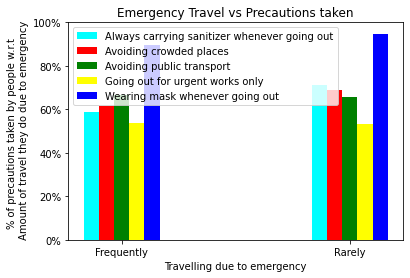

In [21]:
df_emrg_pr = pd.concat([df1.trv_emrg, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p12 = df_emrg_pr.groupby("trv_emrg").aggregate(sum)
df1_12 = pd.DataFrame(pd.value_counts(df1.trv_emrg))
g12 = p12.div(df1_12["trv_emrg"], axis = 0)

f12 = plt.figure()
x12 = np.array([1,4])
y12 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x12 - 0.4, g12["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x12 - 0.2, g12["Avoiding crowded places"], width, color = "red")
plt.bar(x12, g12["Avoiding public transport"], width, color = "green")
plt.bar(x12 + 0.2, g12["Going out for urgent works only"], width, color = "yellow")
plt.bar(x12 + 0.4, g12["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x12, list(g12.index))
plt.yticks(y12, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g12.columns, loc = "best")
plt.xlabel("Travelling due to emergency")
plt.ylabel("% of precautions taken by people w.r.t \n Amount of travel they do due to emergency")
plt.title("Emergency Travel vs Precautions taken")

## Which Age Group is focusing on Exercising the most

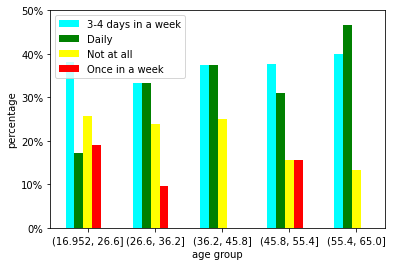

In [22]:
myfun(x = "age_grp",y = "ex_fq",xlabel = "age group")

## How People of Different Age groups are affected Physically during Covid

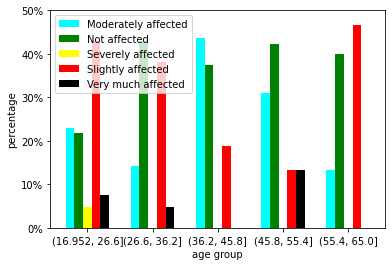

In [23]:
myfun(x = "age_grp",y = "phy_aff",xlabel = "age group")

## How People of Different Age Groups are Mentally affected during Covid

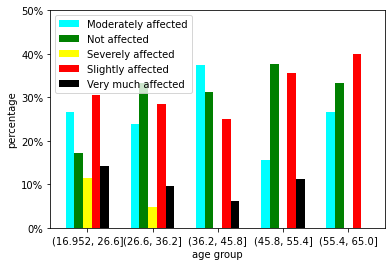

In [24]:
myfun(x = "age_grp",y = "men_aff",xlabel = "age group")

## How the Change in Profession is Affecting people Mentally

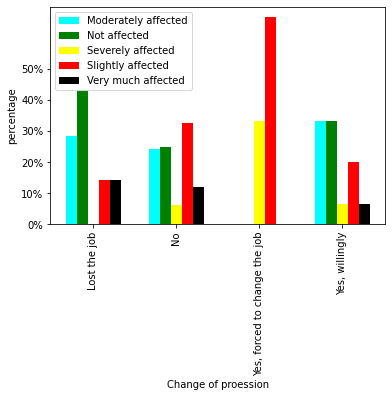

In [25]:
myfun(x = "change_pf",y = "men_aff",xlabel = "Change of proession",rot = 90)

## How the Change in Profession is Affecting people Financially

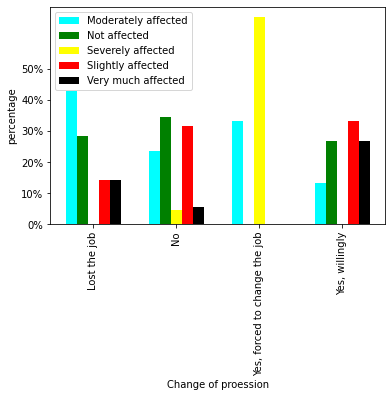

In [26]:
myfun(x = "change_pf",y = "fin_aff",xlabel = "Change of proession",rot = 90)

## How many people are affected with Covid

Text(0.5, 1.0, '% of people affected with covid')

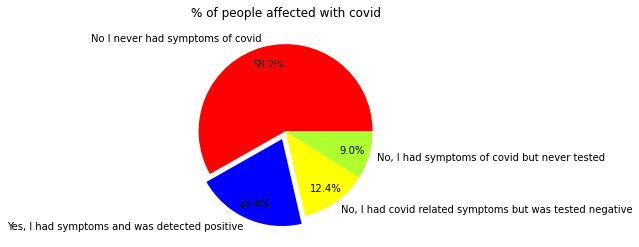

In [27]:
df1_7 = pd.DataFrame(pd.value_counts(df1.covidaff))
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F']
explode = [0, 0.1, 0, 0]

plt.pie(df1_7.covidaff, colors = colors, labels = df1_7.index,
       autopct = '%1.1f%%', pctdistance = 0.8,
       explode = explode)
plt.title("% of people affected with covid")

## How many people Lost their job

Text(0.5, 1.0, '% of people forcefully lost or change the job')

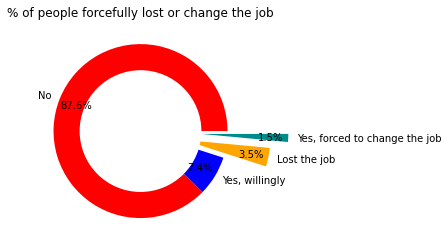

In [28]:
df1_7_1 = pd.DataFrame(pd.value_counts(df1.change_pf))
f7_2 = plt.figure()
colors = ['#FF0000', '#0000FF', '#FFA500', "#008B8B"]
explode = [0, 0, 0.5, 0.7]

plt.pie(df1_7_1.change_pf, colors = colors, labels = df1_7_1.index,
       autopct = '%1.1f%%', pctdistance = 0.8,
       explode = explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("% of people forcefully lost or change the job")

## Vaccination Status

Text(0.5, 1.0, 'Vaccination status')

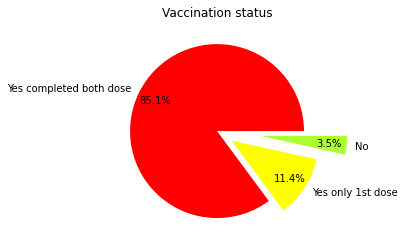

In [29]:
df1_8 = pd.DataFrame(pd.value_counts(df1.vaccine))
colors = ['#FF0000', '#FFFF00', '#ADFF2F']
explode = [0, 0.2, 0.5]

plt.pie(df1_8.vaccine, colors = colors, labels = df1_8.index,
       autopct = '%1.1f%%', pctdistance = 0.8,
       explode = explode)
plt.title("Vaccination status")

# Covid Infected Male Female Donut Plot

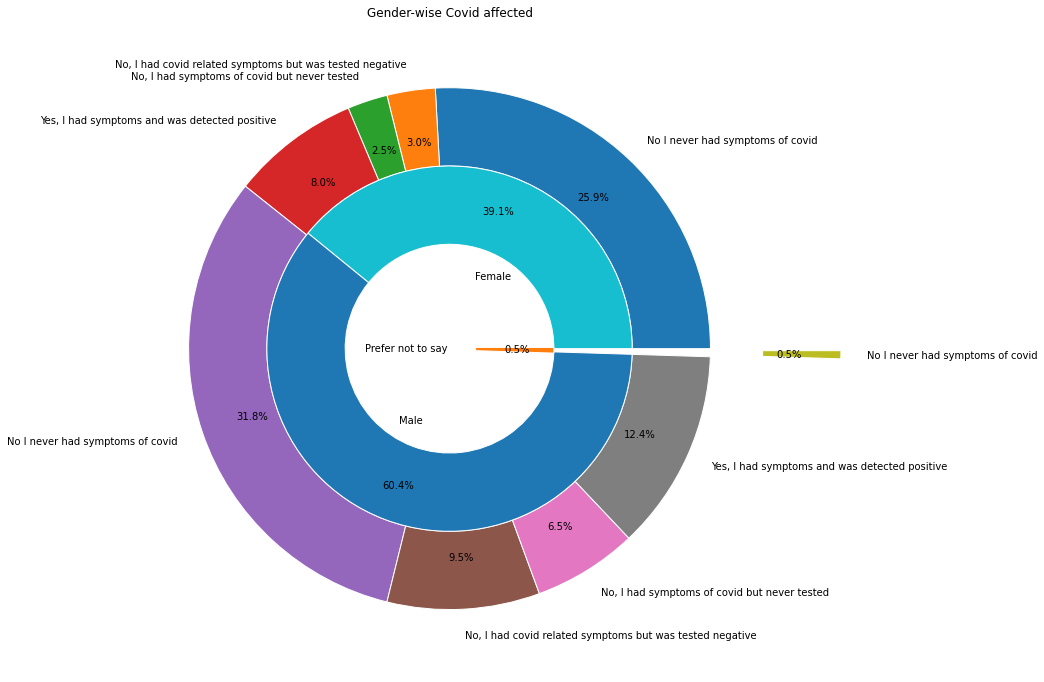

In [30]:
outer1 = df1.groupby(["gender", "covidaff"]).sum()
outer1 = outer1.drop(["age", "aff_cov_wrklf"], axis = 1)
outer1.columns = ["Count"]

inner1 = df1.groupby("gender").sum()
inner1 = inner1.drop(["age", "aff_cov_wrklf"], axis = 1)
inner1.columns = ["Count"]

outer_labels = outer1.index.get_level_values(1)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer1.values.flatten(), radius=1,
       labels= outer_labels,
       autopct='%1.1f%%', pctdistance = 0.8, explode = [0,0,0,0,0,0,0,0,0.5],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner1.values.flatten(), radius=1-size, 
       labels = inner1.index, autopct = "%1.1f%%", pctdistance = 0.8, labeldistance = 0.42, explode = [0,0,-0.3],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="Gender-wise Covid affected")
plt.show()

# Gender-wise Income Distribution Donut Plot

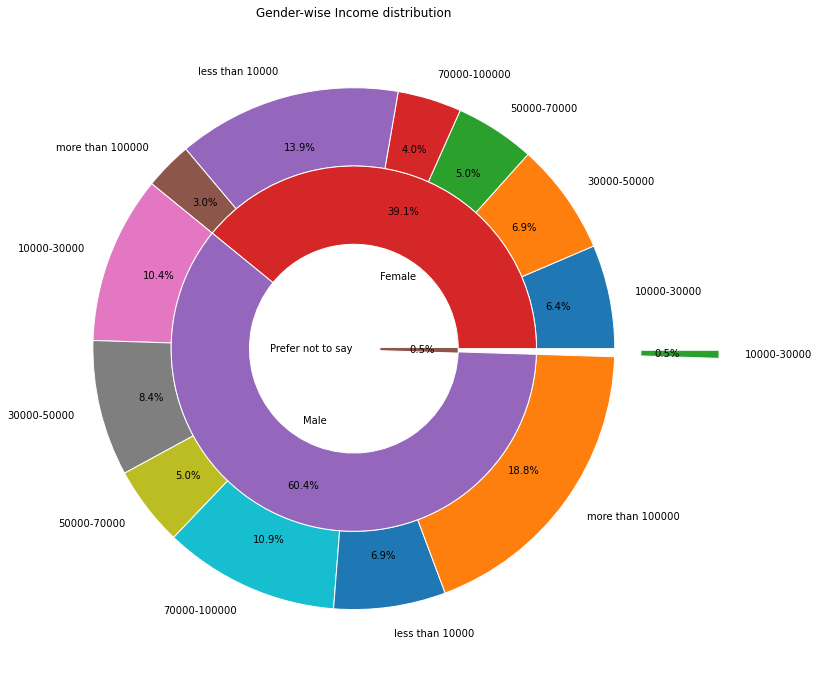

In [31]:
outer2 = df1.groupby(["gender", "income"]).sum()
outer2 = outer2.drop(["age", "aff_cov_wrklf"], axis = 1)
outer2.columns = ["Count"]

inner2 = df1.groupby("gender").sum()
inner2 = inner2.drop(["age", "aff_cov_wrklf"], axis = 1)
inner2.columns = ["Count"]

outer_labels2 = outer2.index.get_level_values(1)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer2.values.flatten(), radius=1,
       labels= outer_labels2, explode = [0,0,0,0,0,0,0,0,0,0,0,0,0.4],
       autopct='%1.1f%%', pctdistance = 0.8,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner2.values.flatten(), radius=1-size, 
       labels = inner2.index, autopct = "%1.1f%%", pctdistance = 0.8, labeldistance = 0.42, explode = [0,0,-0.3],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="Gender-wise Income distribution")
plt.show()

# Genderwise Change in jobs 

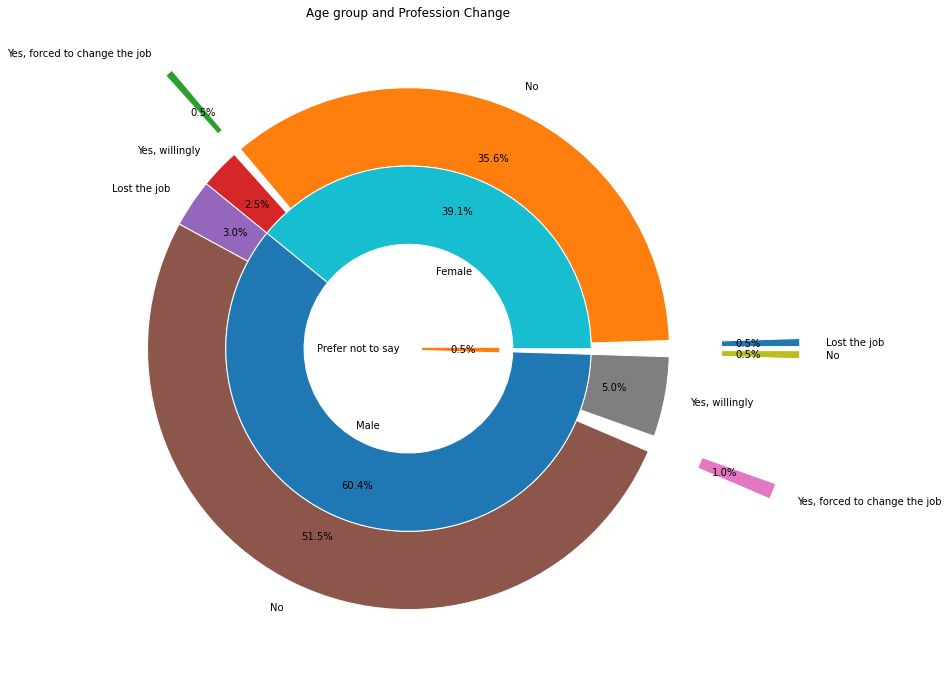

In [32]:
outer4 = df1.groupby(["gender", "change_pf"]).sum()
outer4 = outer4.drop(["age", "aff_cov_wrklf"], axis = 1)
outer4.columns = ["Count"]

inner4 = df1.groupby("gender").sum()
inner4 = inner4.drop(["age", "aff_cov_wrklf"], axis = 1)
inner4.columns = ["Count"]

fig, ax = plt.subplots(figsize = (24,12))
size = 0.3

ax.pie(outer4.values.flatten(), radius = 1,
      labels = outer4.index.get_level_values(1), autopct = "%1.1f%%", pctdistance = 0.8, explode = [0.5,0,0.4,0,0,0,0.5,0,0.5],
      wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner4.values.flatten(), radius = 1-size,
      labels = inner4.index, pctdistance = 0.8, autopct = "%1.1f%%", labeldistance = 0.45, explode = [0,0,-0.35],
      wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="Age group and Profession Change")
plt.show()